In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_current = pd.read_csv("application_data.csv")
df_previous = pd.read_csv("previous_application.csv")

In [4]:
new = pd.merge(df_current, df_previous, how='inner', on='SK_ID_CURR')

In [5]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(80), int64(46), object(32)
memory usage: 1.7+ GB


#### Data Cleaning

###### Some columns have large number of missing values, let's first fix the missing values and then check for other types of data quality problems


In [7]:
# summarising number of missing values in each column
new.isnull().sum()

SK_ID_CURR                            0
TARGET                                0
NAME_CONTRACT_TYPE_x                  0
CODE_GENDER                           0
FLAG_OWN_CAR                          0
FLAG_OWN_REALTY                       0
CNT_CHILDREN                          0
AMT_INCOME_TOTAL                      0
AMT_CREDIT_x                          0
AMT_ANNUITY_x                        93
AMT_GOODS_PRICE_x                  1208
NAME_TYPE_SUITE_x                  3526
NAME_INCOME_TYPE                      0
NAME_EDUCATION_TYPE                   0
NAME_FAMILY_STATUS                    0
NAME_HOUSING_TYPE                     0
REGION_POPULATION_RELATIVE            0
DAYS_BIRTH                            0
DAYS_EMPLOYED                         0
DAYS_REGISTRATION                     0
DAYS_ID_PUBLISH                       0
OWN_CAR_AGE                      937206
FLAG_MOBIL                            0
FLAG_EMP_PHONE                        0
FLAG_WORK_PHONE                       0


In [5]:
# percentage of missing values in each column
x = round(new.isnull().sum()/len(new.index), 2)*100

NameError: name 'new' is not defined

In [6]:
# removing the columns having more than 90% missing values
missing_columns = new.columns[x > 60]

NameError: name 'new' is not defined

In [7]:
new1 = new.drop(missing_columns, axis=1)
print(new1.shape)

NameError: name 'new' is not defined

In [11]:
# summarise number of missing values again
100*(new1.isnull().sum()/len(new1.index))

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE_x             0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT_x                     0.000000
AMT_ANNUITY_x                    0.006578
AMT_GOODS_PRICE_x                0.085449
NAME_TYPE_SUITE_x                0.249416
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [1]:
missing = new1.columns[100*(new1.isnull().sum()/len(new1.index)) > 50]

NameError: name 'new1' is not defined

In [13]:
new2 = new1.drop(missing, axis=1)
print(new2.shape)

(1413701, 120)


In [23]:
# missing values in rows
new2.isnull().sum(axis=1)

0           1
1           1
2           1
3           1
4          15
5          22
6          32
7          22
8          22
9          29
10         32
11         23
12         32
13         28
14         16
15         22
16         17
17         16
18         16
19         17
20         16
21         25
22         16
23         15
24         16
25         16
26         15
27         15
28         15
29         16
           ..
1413671     1
1413672     8
1413673     7
1413674    15
1413675    17
1413676    16
1413677    16
1413678    24
1413679    15
1413680    15
1413681    22
1413682    22
1413683    23
1413684    24
1413685     7
1413686     1
1413687     8
1413688     8
1413689     0
1413690     0
1413691     0
1413692     1
1413693     0
1413694     0
1413695     1
1413696     1
1413697     6
1413698     6
1413699     0
1413700     1
Length: 1413701, dtype: int64

In [14]:
# checking whether some rows have more than 5 missing values
len(new2[new2.isnull().sum(axis=1) > 5].index)

1036146

In [15]:
# retaining the rows having <= 50 NaNs
new2 = new2[new2.isnull().sum(axis=1) <= 30]

In [16]:
print(new2.shape)

(1396620, 120)


In [17]:
new2.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
7,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Consumer electronics,12.0,high,POS household with interest,365243.0,-281.0,49.0,365243.0,365243.0,0.0
8,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
9,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,18.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN
11,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Construction,12.0,middle,POS industry with interest,365243.0,-545.0,-215.0,-425.0,-416.0,0.0


In [18]:
loan1 = new2[['TARGET', 'AMT_INCOME_TOTAL','AMT_APPLICATION', 'AMT_CREDIT_x', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'NAME_YIELD_GROUP', 'DAYS_EMPLOYED', 'NAME_CASH_LOAN_PURPOSE', 
             'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS']]

In [19]:
print(loan1.shape)

(1396620, 12)


#### UNIVARIATE ANALYSIS:
   #### For the tope 12 variables which would impact the buisness objective

In [ ]:
#using this for segmented univariate analysis df.plot.bar(y='', rot=0)

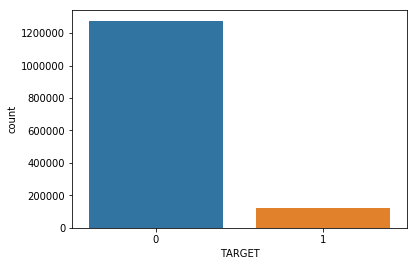

In [33]:
sns.countplot(x="TARGET", data=loan1)
plt.show()

C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


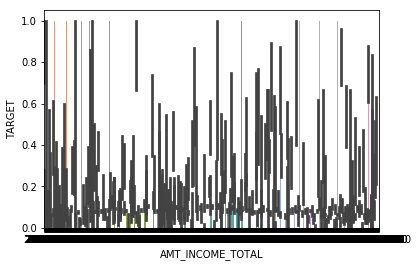

In [34]:
sns.barplot(x='AMT_INCOME_TOTAL', y='TARGET', data=loan1)
plt.show()

In [20]:
C6 = loan1[(loan1['AMT_INCOME_TOTAL'] >= 1500001.0)]
C5 = loan1[(loan1['AMT_INCOME_TOTAL'] >= 1000001.0)& (loan1['AMT_INCOME_TOTAL'] <= 1500000.0)]
C4 = loan1[(loan1['AMT_INCOME_TOTAL'] >= 600001) & (loan1['AMT_INCOME_TOTAL'] <= 1000000.0)]
C3 = loan1[(loan1['AMT_INCOME_TOTAL'] >= 400001) & (loan1['AMT_INCOME_TOTAL'] <= 600000.0)]
C2 = loan1[(loan1['AMT_INCOME_TOTAL'] >= 200001) & (loan1['AMT_INCOME_TOTAL'] <= 4000000.0)]
C1 = loan1[(loan1['AMT_INCOME_TOTAL'] >= 0) & (loan1['AMT_INCOME_TOTAL'] <= 200000)]
c1 = pd.DataFrame(C1)
c2 = pd.DataFrame(C2)
c3 = pd.DataFrame(C3)
c4 = pd.DataFrame(C4)
c5 = pd.DataFrame(C5)
c6 = pd.DataFrame(C6)
c1['Category'] = 'C1'
c2['Category'] = 'C2'
c3['Category'] = 'C3'
c4['Category'] = 'C4'
c5['Category'] = 'C5'
c6['Category'] = 'C6'

In [21]:
## concatinating the individual category data into single data frame ##
DD = pd.concat([c1, c2, c3, c4, c5, c6])
DD.head(5)

,TARGET,AMT_INCOME_TOTAL,AMT_APPLICATION,AMT_CREDIT_x,NAME_HOUSING_TYPE,DAYS_BIRTH,NAME_YIELD_GROUP,DAYS_EMPLOYED,NAME_CASH_LOAN_PURPOSE,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,NAME_CONTRACT_STATUS,Category
4,0,67500.0,24282.0,135000.0,House / apartment,-19046,middle,-225,XAP,Y,Secondary / secondary special,Approved,C1
5,0,135000.0,675000.0,312682.5,House / apartment,-19005,low_normal,-3039,XNA,Y,Secondary / secondary special,Approved,C1
7,0,135000.0,334917.0,312682.5,House / apartment,-19005,high,-3039,XAP,Y,Secondary / secondary special,Approved,C1
8,0,135000.0,270000.0,312682.5,House / apartment,-19005,XNA,-3039,XAP,Y,Secondary / secondary special,Approved,C1
9,0,135000.0,454500.0,312682.5,House / apartment,-19005,high,-3039,XNA,Y,Secondary / secondary special,Approved,C1


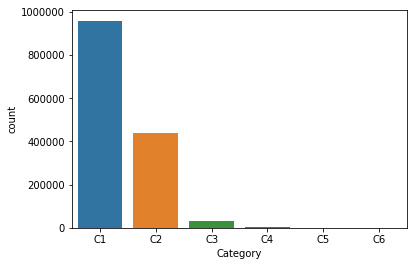

In [46]:
sns.countplot(x="Category", data=DD)
plt.show()

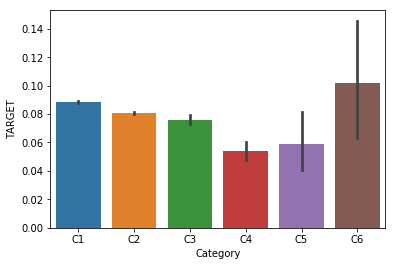

In [47]:
sns.barplot(x='Category', y='TARGET', data=DD)
plt.show()

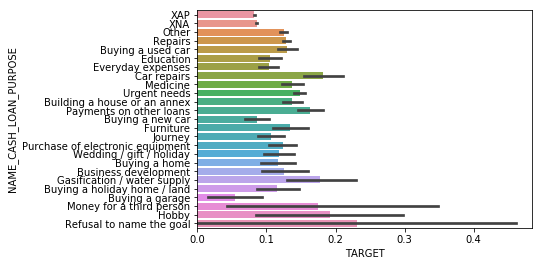

In [48]:
sns.barplot(x='TARGET', y='NAME_CASH_LOAN_PURPOSE', data=DD)
plt.show()

In [ ]:
sns.barplot(x='TARGET', y='NAME_CASH_LOAN_PURPOSE', data=DD)
plt.show()

In [25]:
age_data = DD[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365
sns.barplot(x='YEARS_BIRTH', y='TARGET', data=age_data)
plt.show()

C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


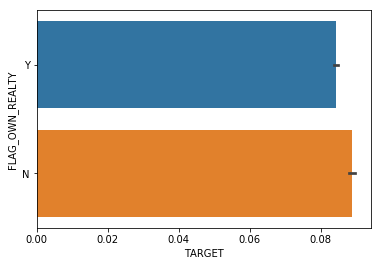

In [27]:
sns.barplot(x='TARGET', y='FLAG_OWN_REALTY', data=DD)
plt.show()

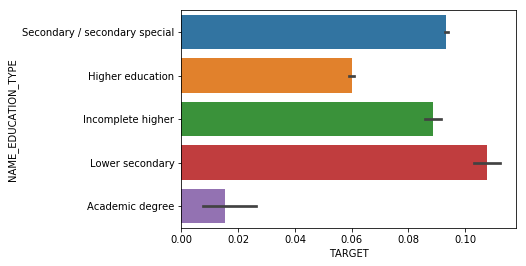

In [29]:
sns.barplot(x='TARGET', y='NAME_EDUCATION_TYPE', data=DD)
plt.show()

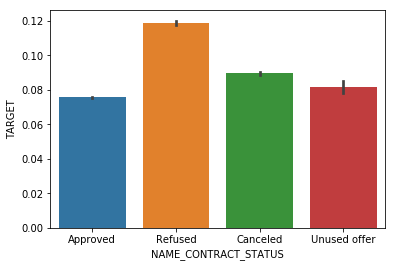

In [30]:
sns.barplot(x='NAME_CONTRACT_STATUS', y='TARGET', data=DD)
plt.show()


In [33]:
age_data.head(50)

,TARGET,DAYS_BIRTH,YEARS_BIRTH
4,0,-19046,-52.180822
5,0,-19005,-52.068493
7,0,-19005,-52.068493
8,0,-19005,-52.068493
9,0,-19005,-52.068493
11,0,-19005,-52.068493
13,0,-19005,-52.068493
14,0,-19932,-54.608219
15,0,-19932,-54.608219
16,0,-19932,-54.608219


In [34]:
age_data['YEARS_BIRTH'] = - age_data['YEARS_BIRTH'] 

C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
age_data.head(20)

,TARGET,DAYS_BIRTH,YEARS_BIRTH
4,0,-19046,52.180822
5,0,-19005,52.068493
7,0,-19005,52.068493
8,0,-19005,52.068493
9,0,-19005,52.068493
11,0,-19005,52.068493
13,0,-19005,52.068493
14,0,-19932,54.608219
15,0,-19932,54.608219
16,0,-19932,54.608219
